# Exploratory Data Analysis

some description....

## 1. Importing the data

In [95]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from operator import attrgetter
from dateutil.relativedelta import relativedelta
import matplotlib.colors as mcolors
import matplotlib.dates as mdates

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL

import plotly.express as px
from plotly.offline import iplot

from modules.loader import Loader

In [3]:
loader = Loader()
df_cust = loader.load_customers()
df_inv = loader.load_inventory()
df_sal = loader.load_sales_data()
df_sal = loader.add_channels(df_sal, df_cust)
df_sal = loader.add_nls(df_sal, df_inv)

C:\Users\fpsaw\Desktop\42578-Advanced-Business-Analytics\modules\loader.py:113: FutureWarning: The default value of regex will change from True to False in a future version.
  df['username'] = df['username'].str.replace(


## 2. General overview of datasets

### 2.1. Shape of data

In [4]:
print('Inventory Shape:', df_inv.shape)
df_inv.head()

Inventory Shape: (19968, 8)


sku                                   descr    brand  quantity  \
0  00001           NASTAVEK ZA MEŠANJE A F1=60MM  PROLINE        10   
1  00002   NASTAVEK ZA MEŠANJE MASE 80x400 TIP A  PROLINE        18   
2  00003   NASTAVEK ZA MEŠANJE MASE 100X500 TIPA  PROLINE        10   
3  00004   NASTAVEK ZA MEŠANJE MASE 80x400 TIP B  PROLINE        14   
4  00005  NASTAVEK ZA MEŠANJE MASE 100X500 TIP B  PROLINE         0   

   last_cost  unit_price category    NLS  
0       0.73        2.28      NaN  False  
1       1.49        4.86      NaN  False  
2       2.10        6.15      NaN  False  
3       1.67        4.86      NaN  False  
4       1.48        6.00      NaN  False

In [5]:
print('Customers Shape:', df_cust.shape)
df_cust.head()

Customers Shape: (12543, 11)


id                              name payer_id  \
0  00001             Prva dimenzija d.o.o.    00001   
1  00002           DOBROTIĆ-MONTAŽA D.O.O.    00002   
2  00003            Masivna Pasivna d.o.o.    00003   
3  00005  ZIDARSKA DELA ZVONKO ŠEBALJ S.P.    00005   
4  00006                   MARCHIOL d.o.o.    00006   

                         payer_name                 city post_code  \
0             Prva dimenzija d.o.o.              medvode      1215   
1           DOBROTIĆ-MONTAŽA D.O.O.               ivanec  HR-42245   
2            Masivna Pasivna d.o.o.                trzin      1236   
3  ZIDARSKA DELA ZVONKO ŠEBALJ S.P.  leskovec pri krškem      8273   
4                   MARCHIOL d.o.o.          nova gorica      5000   

  country_region_code  is_b2c  latitude  longitude  population  
0                  SI   False  46.13049   14.40272     15542.0  
1                  HR    True  46.22306   16.12000      5461.0  
2                  SI   False  46.12527   14.55256      3844.0  
3                  SI   False  45.93566   15.47184      1021.0  
4                  SI    True  45.95604   13.64837     13178.0

In [6]:
print('Sales Shape:', df_sal.shape)
df_sal.head()

Sales Shape: (406324, 12)


sku cust_id payer_id   invoice_no      ddate  quantity  cost  price  \
0     20298  080001   080001  PRA19-00001 2019-07-10         1 -3.31   7.88   
1    X50137  080001   080001  PRA19-00002 2019-07-10         1 -3.09   6.18   
2    X51108  080001   080001  PRA19-00002 2019-07-10         1 -1.72   3.64   
3     10713  080001   080001  PRA19-00006 2019-07-10         1 -2.66   6.33   
4  1-30-497  901105   901105  PRA19-00007 2019-07-10         2 -5.42   7.26   

  sales_person  is_return channel    NLS  
0         SHOP      False    SHOP  False  
1         SHOP      False    SHOP  False  
2         SHOP      False    SHOP   True  
3         SHOP      False    SHOP  False  
4         SHOP      False    SHOP  False

### 2.2. Missing values analysis

In [16]:
def describe_missing(df):
    no_rows = len(df)
    missing_no = df.isna().sum()
    missing_pr = np.around((missing_no / no_rows) * 100, 2)
    df = pd.DataFrame([missing_no, missing_pr], index=['Missing #', 'Missing %'])
    display(df)

In [17]:
print('Missing values: Customers')
describe_missing(df_cust)

Missing values: Customers


id  name  payer_id  payer_name    city  post_code  \
Missing #  0.0  4.00       0.0        4.00  375.00     210.00   
Missing %  0.0  0.03       0.0        0.03    2.99       1.67   

           country_region_code  is_b2c  latitude  longitude  population  
Missing #               191.00     0.0    529.00     529.00      529.00  
Missing %                 1.52     0.0      4.22       4.22        4.22

In [18]:
print('Missing values: Inventory')
describe_missing(df_inv)

Missing values: Inventory


sku  descr  brand  quantity  last_cost  unit_price  category  NLS
Missing #  0.0    0.0    0.0       0.0        0.0         0.0  19311.00  0.0
Missing %  0.0    0.0    0.0       0.0        0.0         0.0     96.71  0.0

In [19]:
print('Missing values: Sales Data')
describe_missing(df_sal)

Missing values: Sales Data


sku  cust_id  payer_id  invoice_no  ddate  quantity  cost  price  \
Missing #  0.0     11.0      11.0         0.0    0.0       0.0   0.0    0.0   
Missing %  0.0      0.0       0.0         0.0    0.0       0.0   0.0    0.0   

           sales_person  is_return  channel  NLS  
Missing #      22678.00        0.0      0.0  0.0  
Missing %          5.58        0.0      0.0  0.0

### 2.3. Simple plots of summary statistics

In [ ]:
# TODO

## 3. Customer Analysis

In [55]:
df_inv.category = df_inv.category.apply(lambda x: 'Other' if x != x else x)
df_sal_inv = df_sal.merge(df_inv[['sku', 'unit_price', 'category']], right_on = 'sku', left_on = 'sku', how = 'inner')

### 3.1. Top and worst clients

In [ ]:
# TODO

### 3.2. Distribution of customer and channel sales

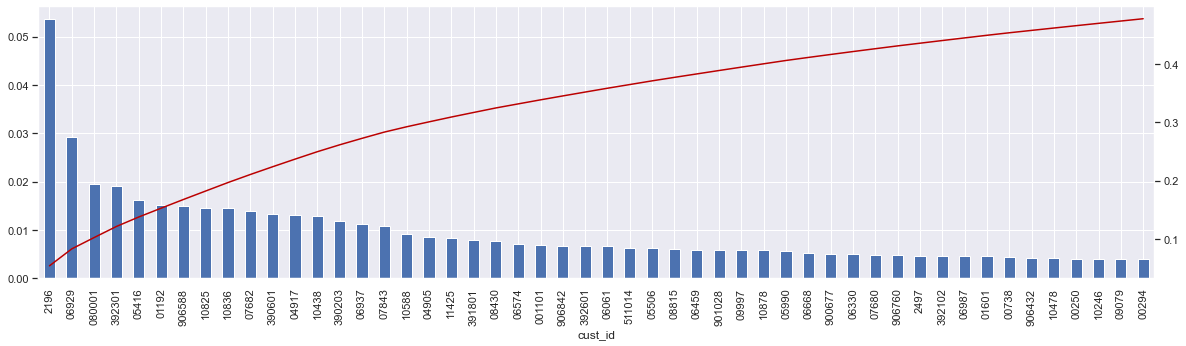

In [59]:
df_cust_dist = df_sal_inv[(df_sal_inv.NLS == False) & (df_sal_inv.price > 0)][['cust_id', 'price']] \
    .groupby('cust_id').sum('price').sort_values(by = 'price', ascending = False)
df_cust_dist['sales_percentage'] = df_cust_dist.price/df_cust_dist.price.sum()
df_cust_dist['sales_perc_acum'] = df_cust_dist['sales_percentage'].rolling(len(df_cust_dist),min_periods = 1).sum()
ax = df_cust_dist['sales_percentage'][:50].plot(kind='bar')
ax2 = ax.twinx()
df_cust_dist['sales_perc_acum'][:50].plot(kind='line', ax = ax2, grid = False, color = ['#BB0000'])
plt.show()

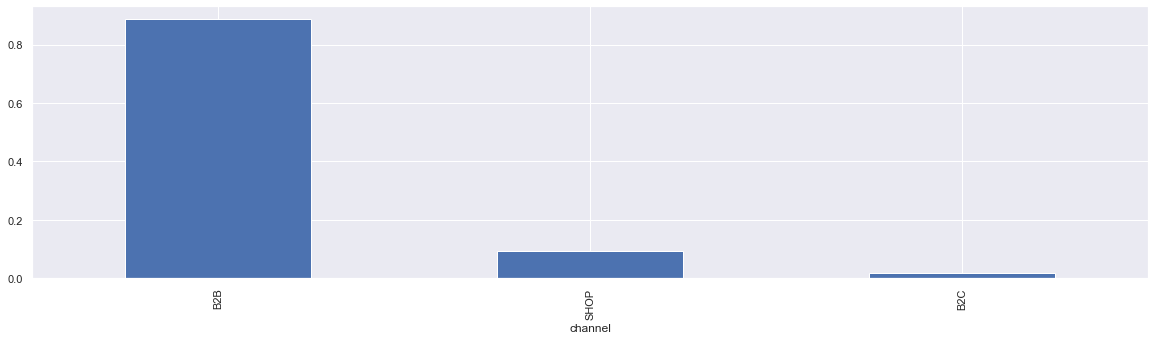

In [66]:
df_cust_dist = df_sal_inv[(df_sal_inv.NLS == False) & (df_sal_inv.price > 0)][['channel', 'price']] \
    .groupby('channel').sum('price').sort_values(by = 'price', ascending = False)
df_cust_dist['sales_percentage'] = df_cust_dist.price / df_cust_dist.price.sum()
df_cust_dist['sales_perc_acum'] = df_cust_dist['sales_percentage'].rolling(len(df_cust_dist),min_periods = 1).sum()
ax = df_cust_dist['sales_percentage'][:50].plot(kind='bar')
plt.show()

### 3.3. Cohort analysis

In [68]:
sales = df_sal[['cust_id', 'invoice_no', 'ddate']].drop_duplicates()

sales['order_month'] = sales['ddate'].dt.to_period('Q')
sales['cohort'] = sales.groupby('cust_id')['ddate'].transform('min').dt.to_period('Q')

df_cohort = sales.groupby(['cohort', 'order_month' ]).agg(n_customers = ('cust_id', 'nunique')).reset_index(drop=False)
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))
cohort_pivot = df_cohort.pivot_table(index ='cohort', columns = 'period_number', values = 'n_customers')

cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

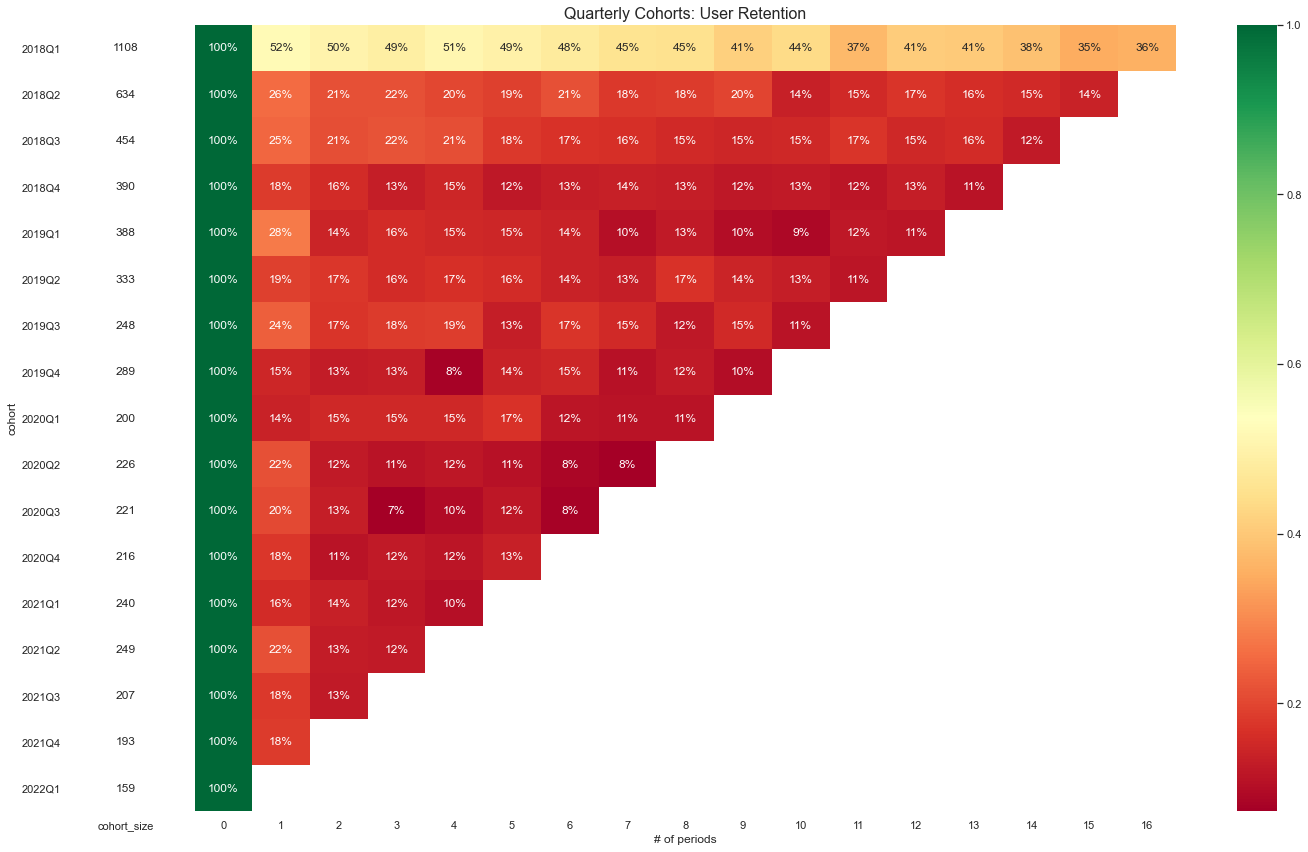

In [71]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(20, 12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Quarterly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

In [ ]:
# TODO: talk about user retantion matrix

### 3.4. RFM clustering

RFM model in particular is at the core of customer segmentation. RFM studies customers’ behaviour and cluster them by using three metrics:

**Recency (R):** measure the number of days since the last purchase to a hypothetical snapshot day. (Time since last order or last engaged with the product)

**Frequency (F):** measure the number of transaction made during the period of study (total number of transaction during timeframe)

**Monetary Value (M):** Measure how much money each customer has spent during the period of study. (Total number of valuable transactions)


In [73]:
df_sal['profit'] = df_sal['price'] + df_sal['cost']
df_sales = df_sal  # copy

chunk_list = []
for chunk in df_sales:
    condition_to_drop = df_sales[df_sales['price']<=0]
    df_sales.drop(condition_to_drop.index, inplace = True)
    df_sales = df_sales.sort_values(by=['ddate'])
    #df_sales.set_index('ddate', inplace = True)
    chunk_list.append(df_sales)
    
df_sales = pd.concat(chunk_list)

df_sales['invoice_date'] = df_sales['ddate']
df_sales = df_sales.set_index('invoice_date')
df_sales['invoice_date'] = df_sales.index

end_date = df_sales.index.max()
start_date = end_date - relativedelta(years = 4)
snapshot_date = end_date + relativedelta(days=1)

study_df = df_sales
data_rfm = study_df.groupby(['cust_id']).agg({
    'invoice_date' : lambda x : (snapshot_date - x.max()).days,
    'invoice_no':'nunique',
    'price':'sum'
})


data_rfm.rename(columns ={
    'invoice_date':'Recency',
    'invoice_no':'Frequency',
    'price':'MonetaryValue'
}, inplace = True)
data_rfm_log = np.log(data_rfm)

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_rfm_log)

#store it separately for clustering
data_rfm_standard = scaler.transform(data_rfm_log)

#turn the processed data back into a dataframe
data_rfm_standard = pd.DataFrame(data = data_rfm_standard, 
                                index = data_rfm.index, 
                                columns = data_rfm.columns) 

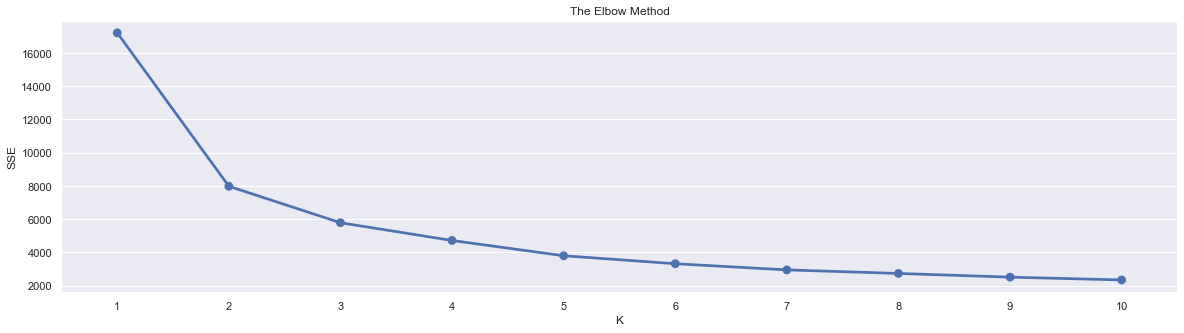

In [75]:
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt

#fit KMeans and calculate SSE for each K
sse = {}
for k in range(1,11):
	kmeans = KMeans(n_clusters = k, random_state=1)
	kmeans.fit(data_rfm_standard)
	sse[k] = kmeans.inertia_ 

#plot SSE for each K
plt.title('The Elbow Method')
plt.xlabel('K'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [76]:
kmeans = KMeans(n_clusters = 4, random_state=1)
#compute k-means clustering on pre-processed data
kmeans.fit(data_rfm_standard)
#extract cluster labels from labels_ attribute
cluster_labels = kmeans.labels_ 

In [77]:
df_k3 = data_rfm.assign(Cluster = cluster_labels) 

In [78]:
summary = df_k3.groupby(['Cluster']).agg({
    'Recency':'mean',
    'Frequency':'mean',
    'MonetaryValue':['mean','count']
    })
print(summary) 

            Recency   Frequency  MonetaryValue      
               mean        mean           mean count
Cluster                                             
0         88.015094    2.855346    4812.368616   795
1         33.553082  134.541096  551446.744452   584
2        863.433913    1.388980    1721.103854  3049
3        433.755743   10.131700   40158.334441  1306


In [80]:
df_k3_outlier = df_k3
df_k3_outlier['cust_id'] = df_k3.index
df_k3_outlier= df_k3_outlier[df_k3_outlier.cust_id != '080001']

In [81]:
fig = px.scatter_3d(df_k3_outlier, x='Recency', y='Frequency', z='MonetaryValue',
                    hover_data=[df_k3_outlier.index],
                    title='RFM Clustering of Clients',
                   color='Cluster')
iplot(fig) 

In [82]:
# TODO: talk about the clusters (in business terms)

## 4. Sales Data Analysis

### 4.1. Top and worst products

In [ ]:
# TODO

### 4.2. Distribution of product and category sales

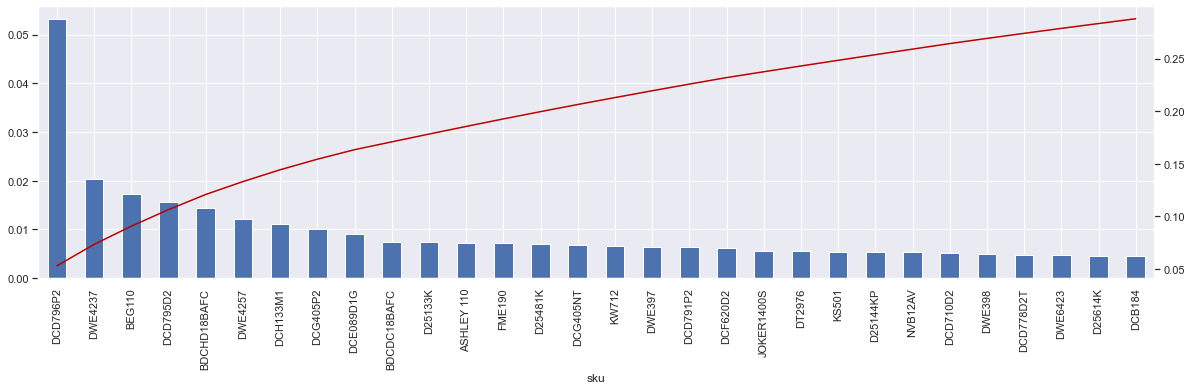

In [57]:
df_sales_dist = df_sal_inv[(df_sal_inv.NLS == False) & (df_sal_inv.price > 0)][['sku', 'price']]\
    .groupby('sku').sum('price').sort_values(by = 'price',ascending = False)
df_sales_dist['sales_percentage'] = df_sales_dist.price/df_sales_dist.price.sum()
df_sales_dist['sales_perc_acum'] = df_sales_dist['sales_percentage'].rolling(len(df_sales_dist),min_periods = 1).sum()
ax = df_sales_dist['sales_percentage'][:30].plot(kind='bar') 
ax2 = ax.twinx()
df_sales_dist['sales_perc_acum'][:30].plot(kind='line', ax = ax2, grid = False, color = ['#BB0000'])
plt.show()

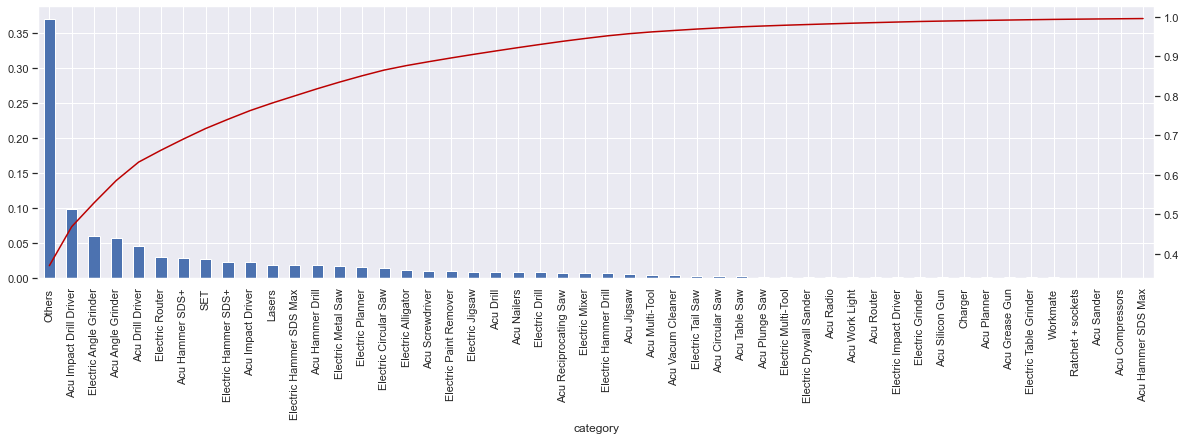

In [58]:
df_cat_dist = df_sal_inv[(df_sal_inv.NLS == False) & (df_sal_inv.price > 0)][['category', 'price']] \
    .groupby('category').sum('price').sort_values(by = 'price',ascending = False)
df_cat_dist['sales_percentage'] = df_cat_dist.price/df_cat_dist.price.sum()
df_cat_dist['sales_perc_acum'] = df_cat_dist['sales_percentage'].rolling(len(df_cat_dist),min_periods = 1).sum()
ax = df_cat_dist['sales_percentage'][:50].plot(kind='bar')
ax2 = ax.twinx()
df_cat_dist['sales_perc_acum'][:50].plot(kind='line', ax = ax2, grid = False, color = ['#BB0000'])
plt.show()

### 4.3. Sales by month

In [91]:
import matplotlib as mpl

def plot_sales_data(df):
    mpl.style.use('default')
    # Aggregate sales to month-year
    df = df_sal.set_index('ddate')
    df = df.resample('MS').sum()

    # Define plot
    plt.rcParams['figure.figsize'] = [20, 5]
    fig, ax = plt.subplots()
    ax.plot(df.index, df['price'], label="sales")
    
    # Change x_axis to show month and year with correct (centered) intervals
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%B'))
    fmt_month = mdates.MonthLocator(interval=1)
    ax.xaxis.set_major_locator(fmt_month)
    ax.ticklabel_format(useOffset=False, style='plain', axis='y')
    
    # Show sales values for each month-year
    for i,j in zip(df.index, df.price):
        ax.annotate(str(int(j)), xy=(i,j))

    # Add lines to locate consecutive years easier
    for year in ['2018', '2019', '2020', '2021', '2022']:
        ax.axvline(pd.Timestamp(f"{year}-01-01"), color='b', linestyle='--')

    # Final styling options
    plt.title(f"Montly Sales Data")
    plt.xticks(rotation=50)
    plt.grid()
    plt.legend(loc="upper left")
    plt.show()

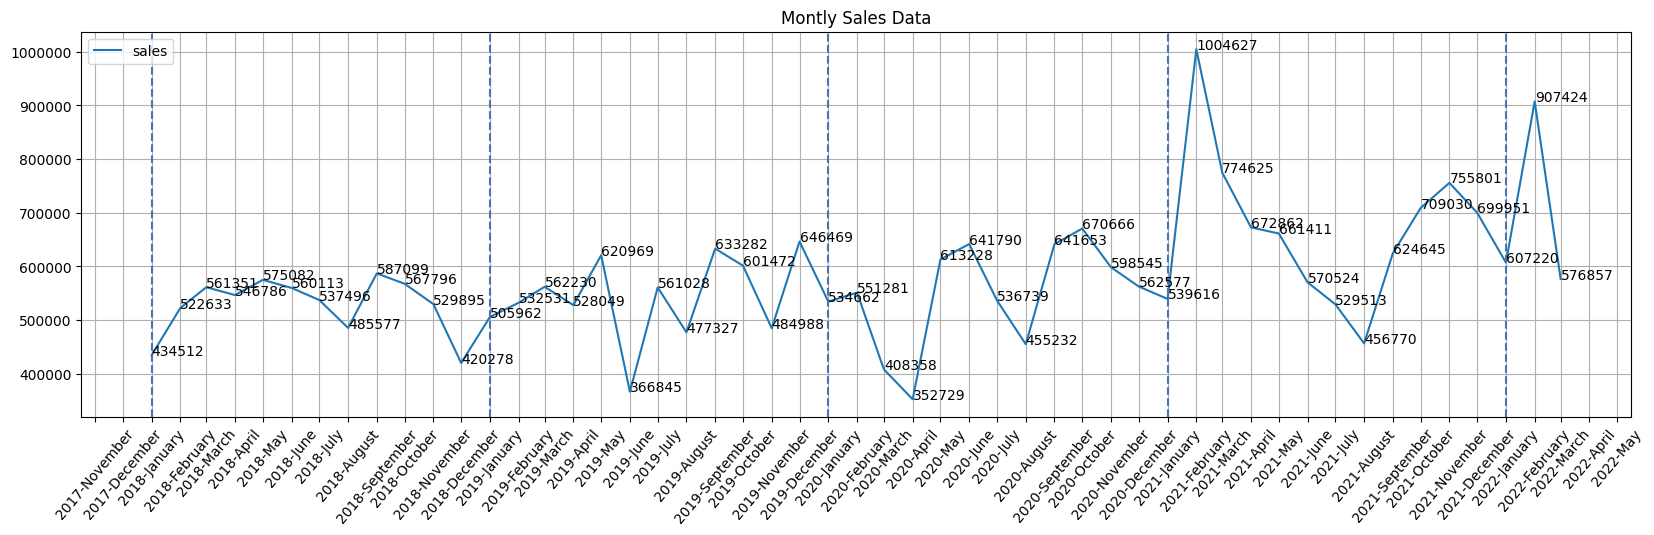

In [92]:
plot_sales_data(df_sal)

### 4.4. Sales by location

In [93]:
HOVERTEMPLATE = """
<b>%{customdata[3]}</b> <br>
Sales: %{customdata[2]}€ <br>
Quantity: %{customdata[1]} <br>
Population: %{customdata[4]} <br><br>
<b>TOP 20 Clients</b> <br> %{customdata[0]}
"""


def show_data(df, sal, col='Znesek_prodaje_dejanski',  bin_scale=True, period=None, sku=None, brand=None):
    if sku:
        sal = sal.loc[sal['sku'] == sku]
    if brand:
        sal = sal.loc[sal['brand'] == brand]
    if period:
        sal = sal.loc[sal['ddate'].dt.year == int(period)]
    
    sal = sal[['cust_id', 'quantity', 'price']] \
        .groupby('cust_id').sum().reset_index()

    df = df[['id', 'name', 'city', 'longitude', 'latitude', 'population']]

    custs = pd.merge(df, sal, left_on='id', right_on='cust_id') \
        .sort_values(by=['price'], ascending=False)
    custs = custs[['city', 'name']].groupby(['city'], as_index=False) \
        .agg(lambda x: '<br>'.join(map(str, x[:20])))

    df_cities = df.drop_duplicates(subset=['city'])[['city', 'longitude', 'latitude', 'population']]

    df = pd.merge(
        df, sal, left_on='id', right_on='cust_id', how='right'
    ).dropna(subset=['id'])
    
    df = df.groupby("city").sum()
    df = df.reset_index()
    df = df[['city', 'quantity', 'price']]
    df = df.loc[df['city'] != '']
    
    df = pd.merge(
        df, 
        df_cities, 
        left_on='city', right_on='city', how='right'
    ).dropna()
    
    df = pd.merge(
        df,
        custs,
        on='city', how='left'
    )
    
    all_data_diffq = (df[col].max() - df[col].min()) / 16
    df["scale"] = (df[col] - df[col].min()) / all_data_diffq + 1
    
    df[col] = df[col].fillna(0)
    df.loc[df[col] < 0] = 0
    
    z = ('scale' if bin_scale else col)

    fig = px.scatter_mapbox(df, lat='latitude', lon='longitude', color=z, size=z, hover_name="city", 
        hover_data=['quantity', 'price'],
        custom_data=['name', 'quantity', 'price', 'city', 'population'],
        center=dict(lat=45.81, lon=15.96), zoom=6,
        color_continuous_scale='bluered', height=800,
        mapbox_style="carto-positron"
    )
    fig.update_traces(hovertemplate=HOVERTEMPLATE)
    fig.show()

In [94]:
show_data(df_cust, df_sal, col='price', bin_scale=False)

### 4.5. Sales seasonality decomposition

In [96]:
def plot_decomposition(df, show):
    plt.rcParams['figure.figsize'] = [20, 5]
    
    df = df.set_index('ddate')
    df = df.resample('MS').sum()
    
    df_lookup = df # .loc[df.index > '2019-12-31']
    
    fig, ax = plt.subplots()
    if "sales" in show:
        ax.plot(df_lookup.index, df_lookup['price'], label="sales")
    if "quantity" in show:
        ax.plot(df_lookup.index, df_lookup['quantity'], label="quantity")
        for i,j in zip(df_lookup.index, df_lookup['quantity']):
            ax.annotate(str(int(j)), xy=(i,j))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%B'))
    fmt_month = mdates.MonthLocator(interval=1)
    ax.xaxis.set_major_locator(fmt_month)
    ax.ticklabel_format(useOffset=False, style='plain', axis='y')
    
    ax.axvline(pd.Timestamp("2018-01-01"), color='b', linestyle='--')
    ax.axvline(pd.Timestamp("2019-01-01"), color='b', linestyle='--')
    ax.axvline(pd.Timestamp("2020-01-01"), color='b', linestyle='--')
    ax.axvline(pd.Timestamp("2021-01-01"), color='b', linestyle='--')
    ax.axvline(pd.Timestamp("2022-01-01"), color='b', linestyle='--')

    plt.title(f"total (seasonal + trend + resid)")
    plt.xticks(rotation=50)
    plt.grid()
    plt.legend(loc="upper left")
    
    try:
        decompose_prodaje = STL(df['price'], seasonal=13, robust=True).fit()
        decompose_quant = STL(df['quantity'], seasonal=13, robust=True).fit()
    
        for decomp_type in ['seasonal', 'trend', 'resid']:
            dec_prod = getattr(decompose_prodaje, decomp_type).fillna(0)
#             dec_prod = dec_prod[dec_prod.index > '2019-12-31']
            dec_quan = getattr(decompose_quant, decomp_type).fillna(0)
#             dec_quan = dec_quan[dec_quan.index > '2019-12-31']

            fig, ax = plt.subplots()
            if "sales" in show:
                ax.plot(dec_prod.index, dec_prod, label="sales")
            if "quantity" in show:
                ax.plot(dec_quan.index, dec_quan, label="quantity")
                for i,j in zip(dec_quan.index, dec_quan):
                    ax.annotate(str(int(j)), xy=(i,j))
            ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%B'))

            fmt_month = mdates.MonthLocator(interval=1)
            ax.xaxis.set_major_locator(fmt_month)
            ax.ticklabel_format(useOffset=False, style='plain', axis='y')
            
            ax.axvline(pd.Timestamp("2018-01-01"), color='b', linestyle='--')
            ax.axvline(pd.Timestamp("2019-01-01"), color='b', linestyle='--')
            ax.axvline(pd.Timestamp("2020-01-01"), color='b', linestyle='--')
            ax.axvline(pd.Timestamp("2021-01-01"), color='b', linestyle='--')
            ax.axvline(pd.Timestamp("2022-01-01"), color='b', linestyle='--')

            plt.title(f"{decomp_type} decomposition")

            plt.xticks(rotation=50)
            plt.grid()
            plt.legend(loc="upper left")
    except ValueError as e:
        print(e)
        print('Cannot show decomposition, must have at least 24 months of data available!')

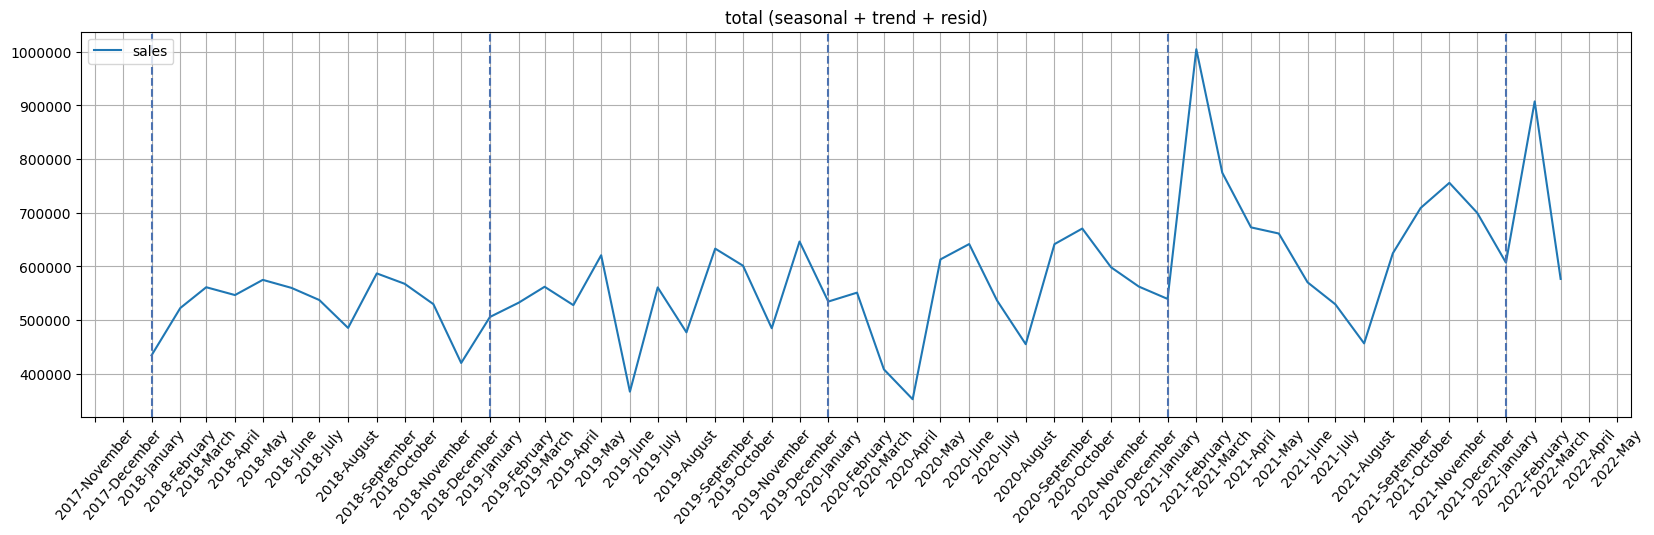

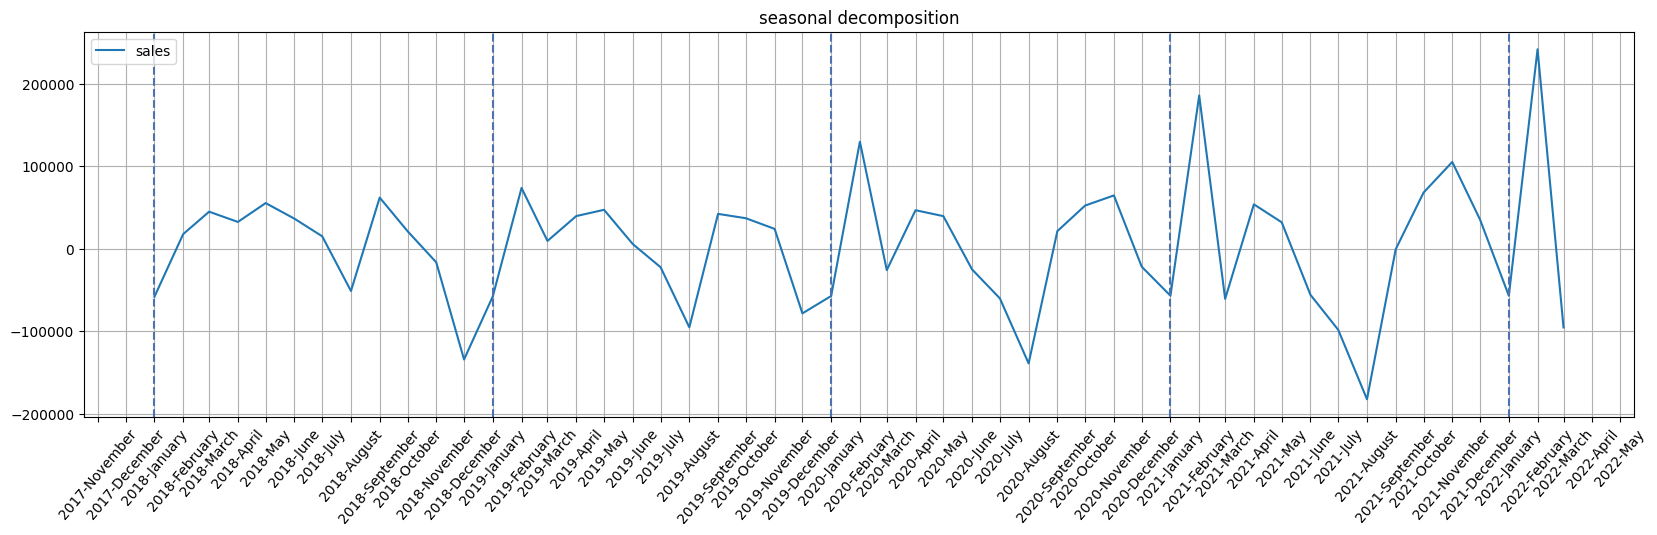

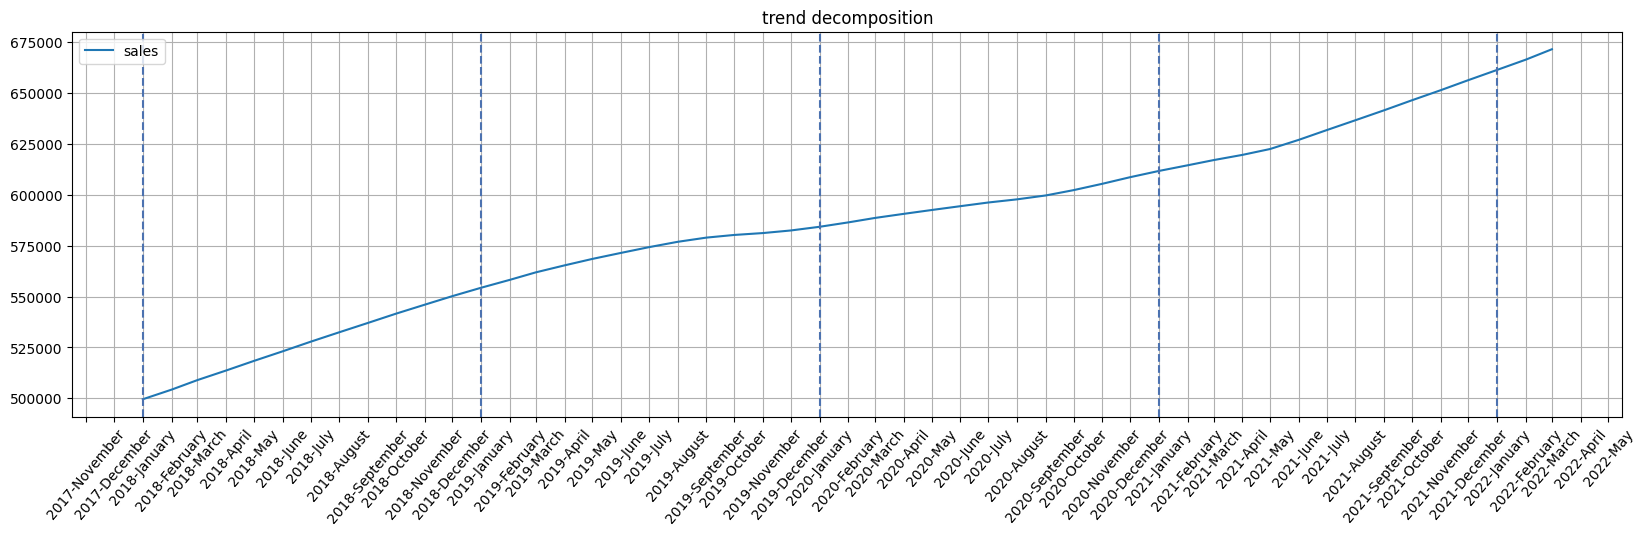

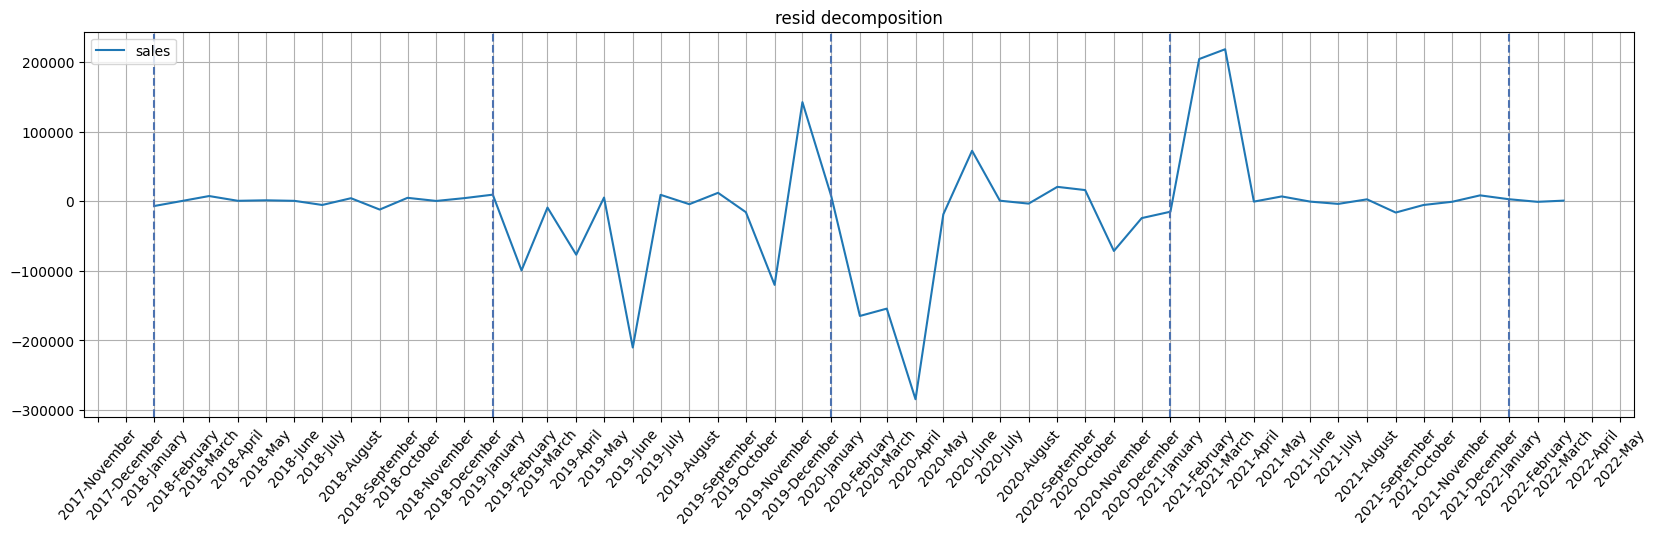

In [97]:
plot_decomposition(df_sal, show=["sales"])

In [ ]:
# TODO: comment

### 4.6. Market basket analysis

In [99]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules

In [105]:
# Remove invalid items
df = df_sal.loc[
    (df_sal['NLS'] == False) &
    (~df_sal['price'].between(-1, 1, inclusive=True)) &
    (~df_sal['cost'].between(-1, 1, inclusive=True))
]
df = df.groupby(['sku']).sum().reset_index()
df = df.loc[
    (df['quantity'] > 10) &  # in total at least 10 items sold (minus returns)
    (df['price'] > 100),    # in total at least sold for 100 eur
    ['sku', 'quantity', 'price']
]
print('All unique items sold:', len(df_sal.groupby(['sku']).sum()))
print('Filtered unique items:', len(df))

All unique items sold: 15421
Filtered unique items: 4545


In [106]:
df_market = df_sal.loc[
    df_sal['sku'].isin(df['sku']) &
    df_sal['quantity'] > 0, 
    ['sku', 'invoice_no', 'quantity']
]

basket = df_market.groupby(['invoice_no', 'sku']).sum().unstack().reset_index().fillna(0).set_index('invoice_no')
basket = basket.applymap(lambda x: 0 if x <= 0 else 1)
basket.columns = basket.columns.droplevel()
frequent_itemsets = fpgrowth(basket.astype(bool), min_support=0.001, use_colnames=True)
df_ar = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

In [107]:
df_ar.sort_values(by=['confidence'], ascending=False).iloc[::2, :]

antecedents  consequents  antecedent support  \
235              (WW100K, SXWTD-FT516)  (FSMH1321J)            0.001680   
236           (SXWTD-FT516, FSMH1321J)     (WW100K)            0.001727   
134  (1-TRA206T, 1-TRA209T, 1-TRA204T)  (1-TRA208T)            0.001094   
122             (1-TRA209T, 1-TRA204T)  (1-TRA208T)            0.001220   
136  (1-TRA206T, 1-TRA204T, 1-TRA208T)  (1-TRA209T)            0.001204   
..                                 ...          ...                 ...   
33                            (KX1650)      (KW712)            0.016197   
222                         (DCD796P2)   (DCH133M1)            0.024248   
50                          (0-47-443)   (0-28-500)            0.016292   
46                          (DCD796P2)    (DWE4257)            0.024248   
152                           (BEG110)    (CS1250L)            0.025152   

     consequent support   support  confidence        lift  leverage  \
235            0.002171  0.001680    1.000000  460.562044  0.001676   
236            0.002219  0.001680    0.972477  438.288467  0.001676   
134            0.003455  0.001062    0.971014  281.046337  0.001058   
122            0.003455  0.001094    0.896104  259.364530  0.001089   
136            0.003090  0.001062    0.881579  285.256343  0.001058   
..                  ...       ...         ...         ...       ...   
33             0.016023  0.001157    0.071429    4.457892  0.000897   
222            0.010111  0.001664    0.068627    6.787126  0.001419   
50             0.008764  0.001030    0.063230    7.214460  0.000887   
46             0.014343  0.001490    0.061438    4.283478  0.001142   
152            0.009905  0.001268    0.050410    5.089109  0.001019   

     conviction  
235         inf  
236   36.252717  
134   34.380803  
122    9.591746  
136    8.418347  
..          ...  
33     1.059668  
222    1.062828  
50     1.058142  
46     1.050178  
152    1.042654  

[121 rows x 9 columns]

In [108]:
# TODO: comment on results